In [10]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sns
import sklearn
import openpyxl

#load the data

In [42]:
customer=pd.read_csv("cust_dimen.csv")
market=pd.read_csv("market_fact.csv")
order=pd.read_csv("orders_dimen.csv")
product=pd.read_csv("prod_dimen.csv")
ship=pd.read_csv("shipping_dimen.csv")

#seeing the data

In [43]:
customer.head()

,Customer_Name,Province,Region,Customer_Segment,Cust_id
0,MUHAMMED MACINTYRE,NUNAVUT,NUNAVUT,SMALL BUSINESS,Cust_1
1,BARRY FRENCH,NUNAVUT,NUNAVUT,CONSUMER,Cust_2
2,CLAY ROZENDAL,NUNAVUT,NUNAVUT,CORPORATE,Cust_3
3,CARLOS SOLTERO,NUNAVUT,NUNAVUT,CONSUMER,Cust_4
4,CARL JACKSON,NUNAVUT,NUNAVUT,CORPORATE,Cust_5


In [44]:
market.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


In [45]:
order.head()

,Order_ID,Order_Date,Order_Priority,Ord_id
0,3,13-10-2010,LOW,Ord_1
1,293,01-10-2012,HIGH,Ord_2
2,483,10-07-2011,HIGH,Ord_3
3,515,28-08-2010,NOT SPECIFIED,Ord_4
4,613,17-06-2011,HIGH,Ord_5


In [46]:
product.head()

,Product_Category,Product_Sub_Category,Prod_id
0,OFFICE SUPPLIES,STORAGE & ORGANIZATION,Prod_1
1,OFFICE SUPPLIES,APPLIANCES,Prod_2
2,OFFICE SUPPLIES,BINDERS AND BINDER ACCESSORIES,Prod_3
3,TECHNOLOGY,TELEPHONES AND COMMUNICATION,Prod_4
4,FURNITURE,OFFICE FURNISHINGS,Prod_5


In [47]:
ship.head()

,Order_ID,Ship_Mode,Ship_Date,Ship_id
0,3,REGULAR AIR,20-10-2010,SHP_1
1,293,DELIVERY TRUCK,02-10-2012,SHP_2
2,293,REGULAR AIR,03-10-2012,SHP_3
3,483,REGULAR AIR,12-07-2011,SHP_4
4,515,REGULAR AIR,30-08-2010,SHP_5


In [48]:
print("customer",customer.columns)
print()
print("market",market.columns)
print()
print("order",order.columns)
print()
print("product",product.columns)
print()
print("shipping",ship.columns)

customer Index(['Customer_Name', 'Province', 'Region', 'Customer_Segment', 'Cust_id'], dtype='object')

market Index(['Ord_id', 'Prod_id', 'Ship_id', 'Cust_id', 'Sales', 'Discount',
       'Order_Quantity', 'Profit', 'Shipping_Cost', 'Product_Base_Margin'],
      dtype='object')

order Index(['Order_ID', 'Order_Date', 'Order_Priority', 'Ord_id'], dtype='object')

product Index(['Product_Category', 'Product_Sub_Category', 'Prod_id'], dtype='object')

shipping Index(['Order_ID', 'Ship_Mode', 'Ship_Date', 'Ship_id'], dtype='object')


In [49]:
merged=pd.merge(market,order,on='Ord_id')  #merging market and order table

In [50]:
merged=pd.merge(merged,product,on='Prod_id') #merging product also

In [51]:
merged=pd.merge(merged,ship,on='Ship_id') #merging ship 

In [52]:
merged=pd.merge(merged,customer,on='Cust_id') #merging customer 

In [53]:
finaldata=merged.copy()  #final data

In [54]:
finaldata.shape

(8399, 22)

In [55]:
finaldata.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,...,Order_Priority,Product_Category,Product_Sub_Category,Order_ID_y,Ship_Mode,Ship_Date,Customer_Name,Province,Region,Customer_Segment
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,...,NOT SPECIFIED,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",36262,REGULAR AIR,28-07-2010,AARON BERGMAN,ALBERTA,WEST,CORPORATE
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,...,HIGH,OFFICE SUPPLIES,PENS & ART SUPPLIES,20513,EXPRESS AIR,08-07-2009,AARON BERGMAN,ALBERTA,WEST,CORPORATE
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,...,NOT SPECIFIED,TECHNOLOGY,TELEPHONES AND COMMUNICATION,36262,EXPRESS AIR,27-07-2010,AARON BERGMAN,ALBERTA,WEST,CORPORATE
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,...,MEDIUM,OFFICE SUPPLIES,PAPER,39682,EXPRESS AIR,11-11-2010,AARON BERGMAN,ALBERTA,WEST,CORPORATE
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38,...,LOW,TECHNOLOGY,OFFICE MACHINES,54019,DELIVERY TRUCK,08-07-2009,AARON BERGMAN,ALBERTA,WEST,CORPORATE


In [56]:
finaldata.isnull().sum()  #for null values

Ord_id                   0
Prod_id                  0
Ship_id                  0
Cust_id                  0
Sales                    0
Discount                 0
Order_Quantity           0
Profit                   0
Shipping_Cost            0
Product_Base_Margin     63
Order_ID_x               0
Order_Date               0
Order_Priority           0
Product_Category         0
Product_Sub_Category     0
Order_ID_y               0
Ship_Mode                0
Ship_Date                0
Customer_Name            0
Province                 0
Region                   0
Customer_Segment         0
dtype: int64

In [57]:
#in product base margin column we got 63 null values , we will fill remove it

In [58]:
finaldata=finaldata.dropna()

In [59]:
finaldata.isnull().sum()

Ord_id                  0
Prod_id                 0
Ship_id                 0
Cust_id                 0
Sales                   0
Discount                0
Order_Quantity          0
Profit                  0
Shipping_Cost           0
Product_Base_Margin     0
Order_ID_x              0
Order_Date              0
Order_Priority          0
Product_Category        0
Product_Sub_Category    0
Order_ID_y              0
Ship_Mode               0
Ship_Date               0
Customer_Name           0
Province                0
Region                  0
Customer_Segment        0
dtype: int64

In [60]:
finaldata.shape

(8336, 22)

In [61]:
#earlier we had 8399 rows , and after removing we have now 8366 rows after removing the misssing value

In [62]:
print(finaldata.duplicated().sum())  #for duplicates

0


In [63]:
# we can see no duplicates in the data

In [64]:
finaldata.info()  #for checking datatpes

<class 'pandas.core.frame.DataFrame'>
Index: 8336 entries, 0 to 8398
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ord_id                8336 non-null   object 
 1   Prod_id               8336 non-null   object 
 2   Ship_id               8336 non-null   object 
 3   Cust_id               8336 non-null   object 
 4   Sales                 8336 non-null   float64
 5   Discount              8336 non-null   float64
 6   Order_Quantity        8336 non-null   int64  
 7   Profit                8336 non-null   float64
 8   Shipping_Cost         8336 non-null   float64
 9   Product_Base_Margin   8336 non-null   float64
 10  Order_ID_x            8336 non-null   int64  
 11  Order_Date            8336 non-null   object 
 12  Order_Priority        8336 non-null   object 
 13  Product_Category      8336 non-null   object 
 14  Product_Sub_Category  8336 non-null   object 
 15  Order_ID_y            8336

In [65]:
#from this I can see that I have two order id and orderdate and shipdate should be in datetime format

In [69]:
ship_dates = pd.to_datetime(finaldata['Ship_Date'].astype(str),dayfirst=True, errors='coerce')

In [70]:
finaldata = finaldata.drop(columns=['Ship_Date'])

In [71]:
finaldata['Ship_Date'] = ship_dates

In [72]:
print(finaldata['Ship_Date'].dtype)

datetime64[ns]


In [73]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8336 entries, 0 to 8398
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Ord_id                8336 non-null   object        
 1   Prod_id               8336 non-null   object        
 2   Ship_id               8336 non-null   object        
 3   Cust_id               8336 non-null   object        
 4   Sales                 8336 non-null   float64       
 5   Discount              8336 non-null   float64       
 6   Order_Quantity        8336 non-null   int64         
 7   Profit                8336 non-null   float64       
 8   Shipping_Cost         8336 non-null   float64       
 9   Product_Base_Margin   8336 non-null   float64       
 10  Order_ID_x            8336 non-null   int64         
 11  Order_Date            8336 non-null   object        
 12  Order_Priority        8336 non-null   object        
 13  Product_Category      8

In [74]:
# EDA
#Which product sells the most?
#Which region gives the most profit?
#Which customer is most valuable?
#Does shipping mode affect cost or delivery?

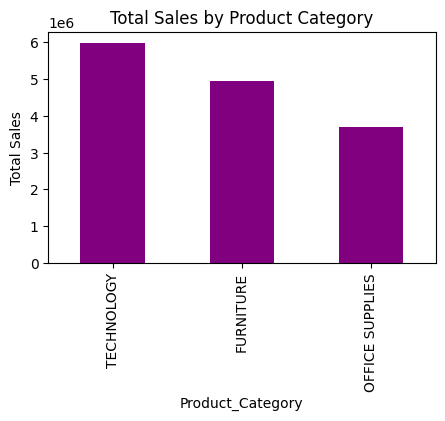

In [75]:
py.figure(figsize=(5,3))
categoryvssales = finaldata.groupby('Product_Category')['Sales'].sum().sort_values(ascending=False)
categoryvssales.plot(kind='bar', color='purple')
py.title("Total Sales by Product Category")
py.ylabel("Total Sales")
py.show()

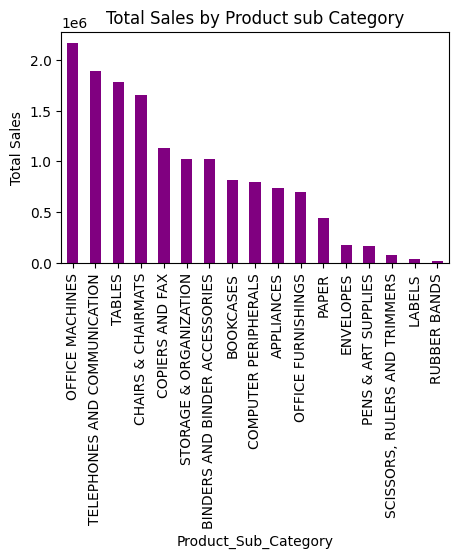

In [76]:
py.figure(figsize=(5,3))
categoryvssales = finaldata.groupby('Product_Sub_Category')['Sales'].sum().sort_values(ascending=False)
categoryvssales.plot(kind='bar', color='purple')
py.title("Total Sales by Product sub Category")
py.ylabel("Total Sales")
py.show()

In [77]:
#offices machines are sellef most from technologies category

<Axes: xlabel='Region'>

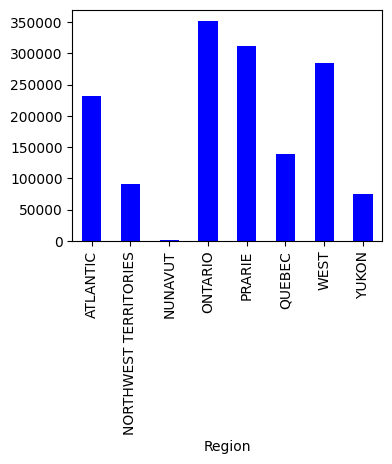

In [84]:
py.figure(figsize=(4,3))
regionprofit=finaldata.groupby('Region')['Profit'].sum()
regionprofit.plot(kind='bar',color='blue')



In [87]:
#ontario is the most profitable region

In [88]:
regionprofit.sort_values(ascending=False)

Region
ONTARIO                  352263.51
PRARIE                   311652.23
WEST                     285506.54
ATLANTIC                 231491.19
QUEBEC                   138658.88
NORTHWEST TERRITORIES     91755.44
YUKON                     74404.80
NUNAVUT                    1506.43
Name: Profit, dtype: float64

In [89]:
finaldata.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,...,Order_Priority,Product_Category,Product_Sub_Category,Order_ID_y,Ship_Mode,Customer_Name,Province,Region,Customer_Segment,Ship_Date
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,...,NOT SPECIFIED,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",36262,REGULAR AIR,AARON BERGMAN,ALBERTA,WEST,CORPORATE,2010-07-28
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,...,HIGH,OFFICE SUPPLIES,PENS & ART SUPPLIES,20513,EXPRESS AIR,AARON BERGMAN,ALBERTA,WEST,CORPORATE,2009-07-08
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,...,NOT SPECIFIED,TECHNOLOGY,TELEPHONES AND COMMUNICATION,36262,EXPRESS AIR,AARON BERGMAN,ALBERTA,WEST,CORPORATE,2010-07-27
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,...,MEDIUM,OFFICE SUPPLIES,PAPER,39682,EXPRESS AIR,AARON BERGMAN,ALBERTA,WEST,CORPORATE,2010-11-11
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38,...,LOW,TECHNOLOGY,OFFICE MACHINES,54019,DELIVERY TRUCK,AARON BERGMAN,ALBERTA,WEST,CORPORATE,2009-07-08


In [94]:
mostcalcust=finaldata.groupby('Cust_id')['Sales'].sum().sort_values(ascending=False)
mostcalcust

Cust_id
Cust_1151    97011.1940
Cust_942     75967.5905
Cust_1007    72331.8800
Cust_1799    70426.5900
Cust_1421    67285.1320
                ...    
Cust_1761       11.0800
Cust_1256       10.9400
Cust_615         9.3700
Cust_269         5.0600
Cust_881         3.4200
Name: Sales, Length: 1829, dtype: float64

In [96]:
mostvaluedcustomer = finaldata.loc[finaldata['Cust_id'] == 'Cust_1151', 'Customer_Name'].values[0]
print(mostvaluedcustomer)


EMILY PHAN


In [ ]:
#emily phan is the most valued customer as she has spent the most

<Axes: xlabel='Ship_Mode', ylabel='Shipping_Cost'>

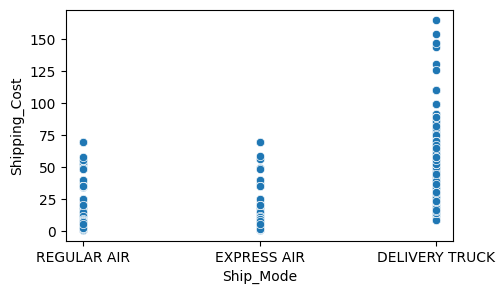

In [100]:
py.figure(figsize=(5,3))
sns.scatterplot(x='Ship_Mode',y='Shipping_Cost',data=finaldata)

In [101]:
finaldata['Ship_Mode'].value_counts()

Ship_Mode
REGULAR AIR       6233
DELIVERY TRUCK    1130
EXPRESS AIR        973
Name: count, dtype: int64

<Axes: xlabel='Shipping_Cost', ylabel='Profit'>

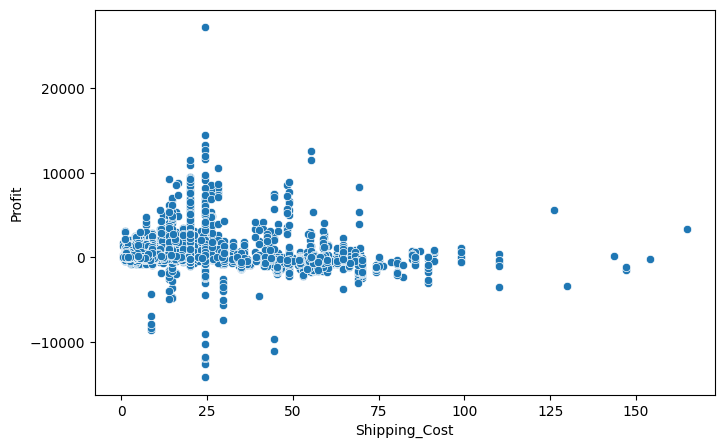

In [103]:
py.figure(figsize=(8,5))
sns.scatterplot(x='Shipping_Cost', y='Profit', data=finaldata)

In [107]:
monthly_sales = finaldata.groupby(finaldata['Ship_Date'].dt.to_period("M"))['Sales'].sum()

<Axes: xlabel='Ship_Date', ylabel='Sales'>

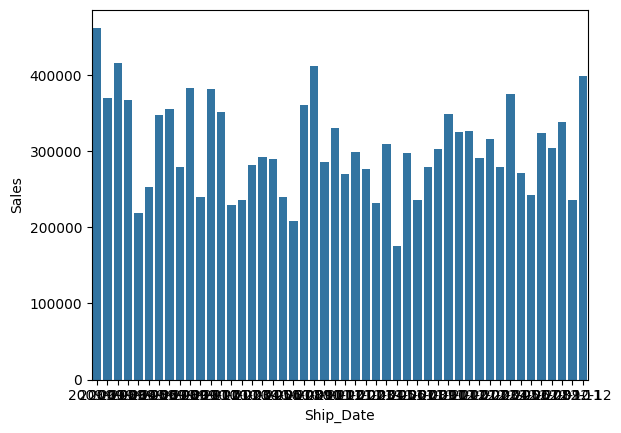

In [108]:
sns.barplot(monthly_sales )